## Proof of the pudding

We imported the following libraries for preprocessing purposes:

In [4]:
from PIL import Image
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

The following code iterates through our collected and labeled images. In the process we crop the moles and save them into separate files based on the previously generated .xml files. The cropped images also rescaled, thus the output images become 32x32 3-channel 8bit images in .bmp file format.

In [5]:
test_imgs = []
i_mole = 1
for i_image in range(1,250):  # iterating through the images
    if os.path.exists('Test/%d.xml' % (i_image)):  # checking existance of file
        tree = ET.parse('Test/%d.xml' % (i_image))  # reading the i-th .xml files
        root = tree.getroot()
        img = Image.open('Test/%d.jpg' % (i_image))  # reading the i-th image
        for mole in root.findall('object'):  # iterating through the labeled objects
            box = mole.find('bndbox')  # acquiring the bounding box of the mole
            xmin = int(box.find('xmin').text)
            xmax = int(box.find('xmax').text)
            ymax = int(box.find('ymax').text)
            ymin = int(box.find('ymin').text)
            area = (xmin, ymin, xmax, ymax)
            cropped_img = img.crop(area)  # cropping the image
            cropped_img = cropped_img.resize((32,32))  # resizing the image
            test_imgs.append(cropped_img)  # saving the image
            i_mole += 1

We present two examples of the cropped moles:

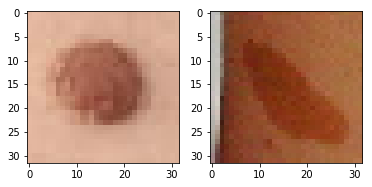

In [6]:
example_mole1=plt.imread('Cropped/8.bmp')
example_mole2=plt.imread('Cropped/810.bmp')
figure = plt.figure()
figure.add_subplot(1,2,1)
plt.imshow(example_mole1)
figure.add_subplot(1,2,2)
plt.imshow(example_mole2)
plt.show()

The following code iterates through the selected images, which will provide samples for non-mole elements. Notation for the background elements is (<i>bckg</i>). We distribute 56 points in one image evenly where we sample 32x32 regions. The cropped images checked afterwards for eliminate the unlikely events when the samples contain moles.

In [7]:
i_bckg = 1
for i_img in range(1,254):
    if os.path.exists('DataBaseBCKG/%d.jpg' % (i_img)):  # checking existance of file
        img = Image.open('DataBaseBCKG/%d.jpg' % (i_img))  # reading the i-th image
        width, height = img.size
        x_scale = int(width/12-1)  # distance between samples in x direction
        y_scale = int(height/12-1)  # distance between samples in y direction
        for x_point in range(1,12):
            for y_point in range(1,12):
                area = (x_point*x_scale-16, y_point*y_scale-16, x_point*x_scale+16, y_point*y_scale+16)  # sampled area
                cropped_img = img.crop(area)  # cropping the image
                cropped_img.save('CroppedBCKG/%d.bmp' % (i_bckg))  # saving the image
                i_bckg += 1

We present two examples of the non-mole cropped images:

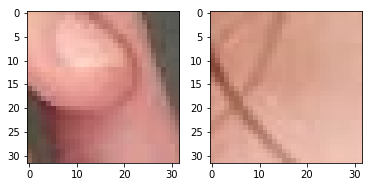

In [7]:
example_bckg1=plt.imread('CroppedBCKG/4.bmp')
example_bckg2=plt.imread('CroppedBCKG/117.bmp')
figure = plt.figure()
figure.add_subplot(1,2,1)
plt.imshow(example_bckg1)
figure.add_subplot(1,2,2)
plt.imshow(example_bckg2)
plt.show()